In [29]:
import pymc3 as pm
import scipy as sp
import numpy as np
from matplotlib.patches import Ellipse
from theano import tensor as T

import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data

from pymc3.distributions.timeseries import GaussianRandomWalk

%matplotlib inline

In [31]:
prices = data.YahooDailyReader(symbols=['GLD', 'GDX'], end='2014-8-1').read()

In [32]:
prices = prices.iloc[:, prices.columns.get_level_values(0) == 'Adj Close']
prices.columns = prices.columns.droplevel()

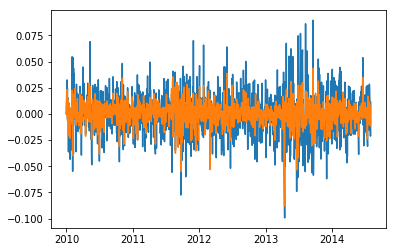

In [33]:
log_rets = 1 + prices.apply(np.log).diff()
rets = prices.pct_change()
rets.iloc[0] = 0
plt.plot(rets.index, rets);

In [34]:
log_rets.iloc[0] = 0

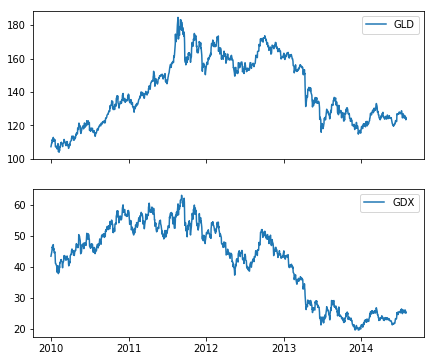

In [35]:
f, ax = plt.subplots(2,1, figsize = (7, 6), sharex=True)

ax[0].plot(prices.GLD, label = 'GLD')
ax[0].legend()
ax[1].plot(prices.GDX, label = 'GDX')
ax[1].legend()

In [36]:
rets = log_rets

In [46]:
with pm.Model() as FullModel:
    packed_Cov = pm.LKJCholeskyCov('packed_Cov', n=rets.shape[1],
                                 eta=2., sd_dist=pm.HalfCauchy.dist(2.5))
    chol = pm.expand_packed_triangular(rets.shape[1], packed_Cov)
    mvSeries = pm.MvGaussianRandomWalk('mvSeries', shape=rets.shape, chol=chol, observed=rets)
    T.printing.Print('mvSeries shape')(mvSeries.shape)

mvSeries shape __str__ = [1154    2]


/Users/vivek/anaconda3/envs/i18r/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/vivek/anaconda3/envs/i18r/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
